In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
tr_path = 'Lending_Train.csv'
te_path = 'Lending_Test.csv'
tr_df = pd.read_csv(tr_path)
tr_df.head()
te_df = pd.read_csv(te_path)
te_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
tr_df.shape 


(614, 13)

In [4]:
te_df.shape

(367, 12)

In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
tr_df.drop('Loan_ID',axis = 1 ,inplace = True)
te_df.drop('Loan_ID',axis = 1 ,inplace = True)
print (f'training set (row,col):{tr_df.shape} \n\n testing set (row,col):{te_df.shape}')

training set (row,col):(614, 12) 

 testing set (row,col):(367, 11)


In [8]:
tr_df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
print('before filling missing values')
null_cols = {'Credit_History','Self_Employed','LoanAmount','Loan_Amount_Term','Dependents','Gender','Married'}
for col in null_cols:
    print(f'{col}: \n {tr_df[col].value_counts()} \n','-'*50)
    tr_df[col]= tr_df[col].fillna(tr_df[col].dropna().mode().values[0])

tr_df.isnull().sum().sort_values(ascending = False)
print("After filling missing values \n\n")
for col in null_cols:
    print(f'{col}: \n {tr_df[col].value_counts()} \n','-'*50)

before filling missing values
Gender: 
 Gender
Male      489
Female    112
Name: count, dtype: int64 
 --------------------------------------------------
Credit_History: 
 Credit_History
1.0    475
0.0     89
Name: count, dtype: int64 
 --------------------------------------------------
Loan_Amount_Term: 
 Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64 
 --------------------------------------------------
Dependents: 
 Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64 
 --------------------------------------------------
LoanAmount: 
 LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64 
 --------------------------------------------------
Self_Employed: 
 Self_Employed
No     500
Yes     82
Name: count, dtype: 

In [10]:
tr_df.isnull().sum().sort_values(ascending = False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
num = tr_df.select_dtypes('number').columns.tolist()
cat = tr_df.select_dtypes('object').columns.tolist()
loan_num = tr_df[num]
loan_cat = tr_df[cat]

C:\Users\Admin\AppData\Local\Temp\ipykernel_20236\114964329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=loan_cat[cat[-1]],palette='muted')


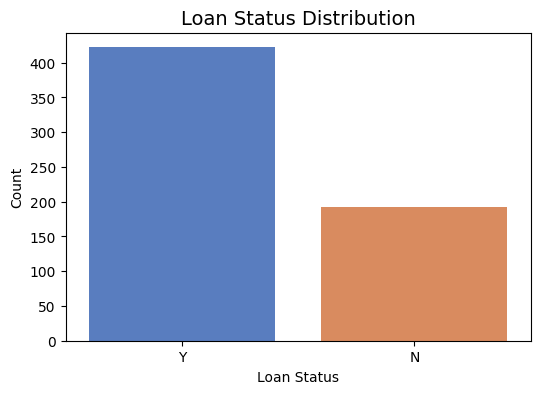

In [12]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x=loan_cat[cat[-1]],palette='muted')
plt.title('Loan Status Distribution', fontsize = 14)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

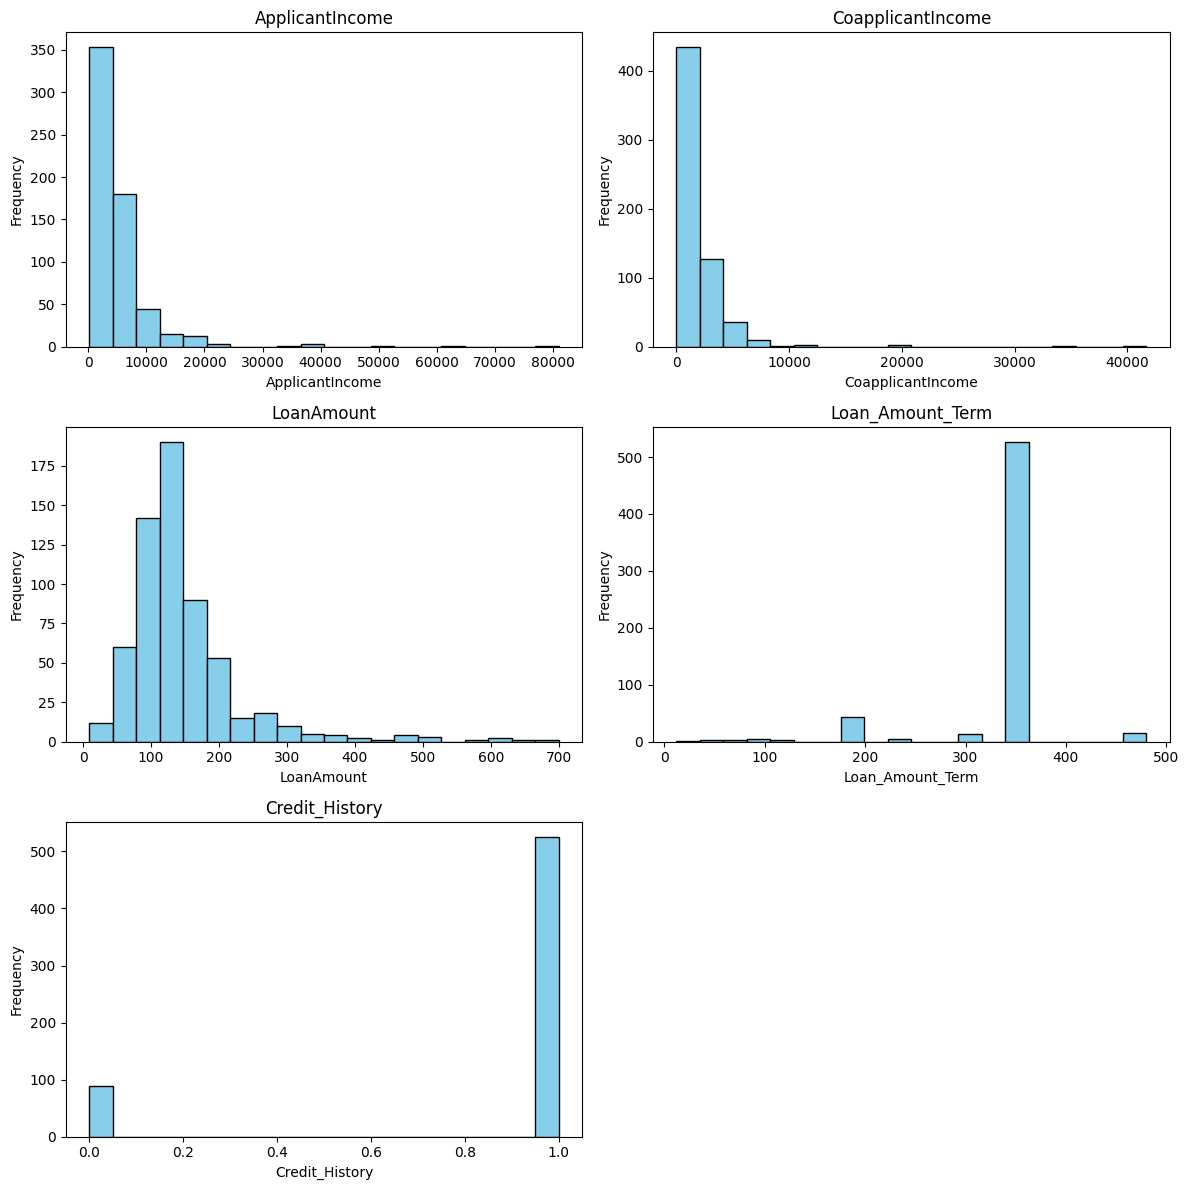

In [13]:
import math
cols = 2
row = math.ceil((len(cat)-1)/cols)
fig, axes = plt.subplots(row,cols, figsize = (12,4*row))
axes = axes.flatten()
for i,col in enumerate(loan_num.columns):
    axes[i].hist(loan_num[col], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

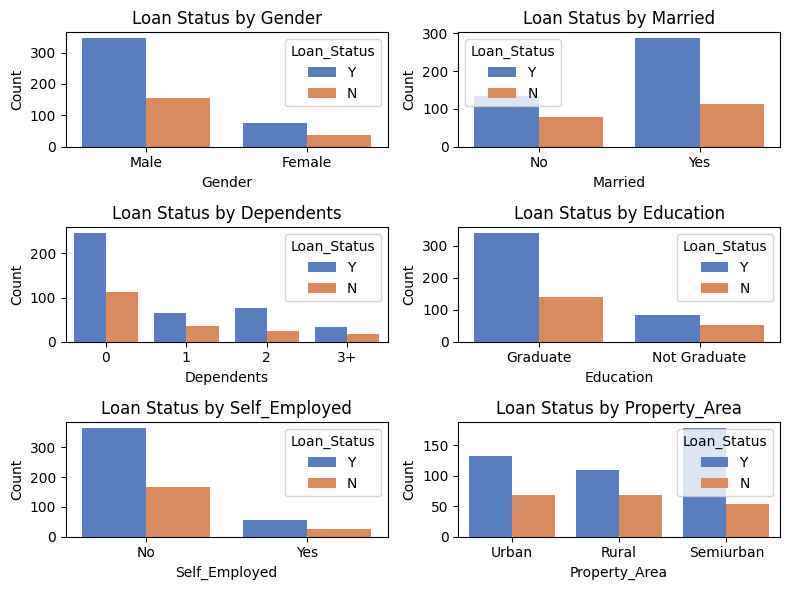

In [14]:
plt.figure(figsize=(8,6))
for idx,i in enumerate(cat[:-1],1):
    plt.subplot(len(cat[:-1])//2 + len(cat[:-1])%2, 2 ,idx)
    sns.countplot(x=i, hue='Loan_Status',data=tr_df,palette = 'muted')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Loan Status by {i}')


plt.tight_layout()
plt.show()

In [15]:
to_numeric = {'Male':1,'Female':2,'Yes':1,'No':2,'3+':3,'Graduate':1,'Not Graduate':2,'Rural':1,'Urban':3,'Semiurban':2,'Y':1,'N':0}
tr_df = tr_df.applymap(lambda lble: to_numeric.get(lble) if lble in to_numeric else lble)
te_df = te_df.applymap(lambda lble: to_numeric.get(lble) if lble in to_numeric else lble)
Dependents = pd.to_numeric(tr_df.Dependents)
Dependents_ = pd.to_numeric(te_df.Dependents)
tr_df.drop('Dependents', axis=1 ,inplace = True)
te_df.drop('Dependents', axis=1 ,inplace = True)

tr_df = pd.concat([tr_df,Dependents], axis = 1)
te_df = pd.concat([te_df,Dependents_], axis = 1)
print(f'training set (row,col):{tr_df.shape} \n\n testing set (row,col):{te_df.shape}')
print(tr_df.info())



training set (row,col):(614, 12) 

 testing set (row,col):(367, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None


C:\Users\Admin\AppData\Local\Temp\ipykernel_20236\342506297.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tr_df = tr_df.applymap(lambda lble: to_numeric.get(lble) if lble in to_numeric else lble)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20236\342506297.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  te_df = te_df.applymap(lambda lble: to_numeric.get(lble) if lble in to_numeric else lble)


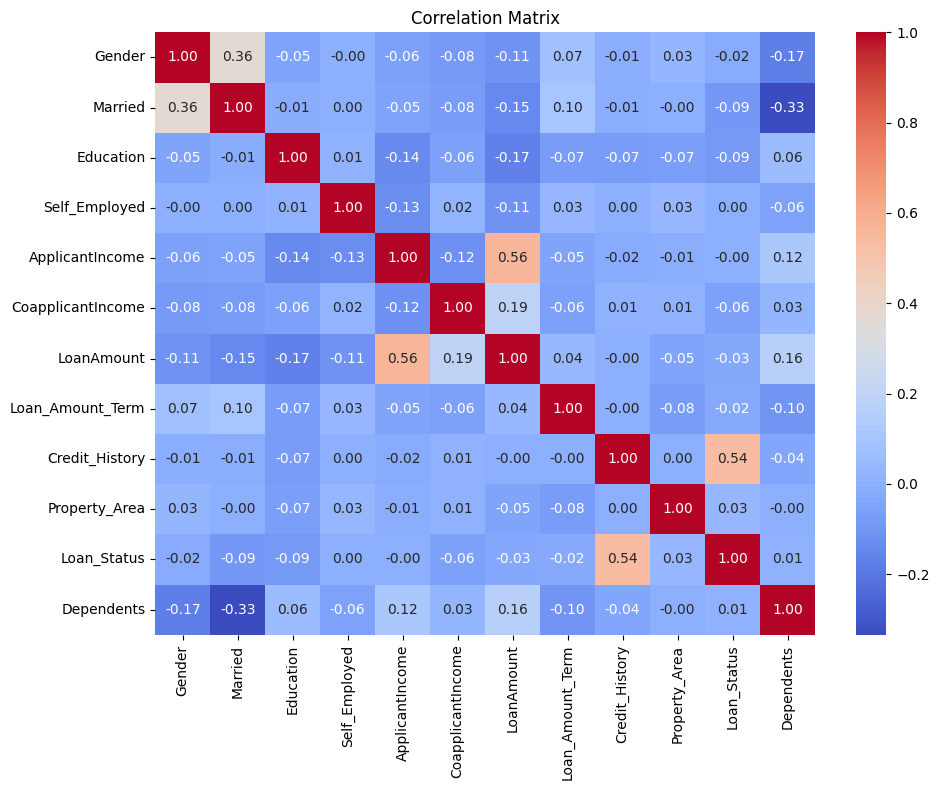

In [16]:
corr = tr_df.corr(numeric_only = True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize = 12)
plt.tight_layout()
plt.show()

In [17]:
y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.44      0.49      0.46        51
           1       0.80      0.76      0.78       134

    accuracy                           0.69       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.70      0.69      0.69       185

68.65% Accurate


In [19]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")
# print('accuracy is',accuracy_score(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# สร้างโมเดล Gaussian Naïve Bayes
GNB = GaussianNB()
GNB.fit(X_train, y_train)  # เทรนโมเดล

# ทำนายผล
y_predict = GNB.predict(X_test)

# แสดงผลการทำนายโดยใช้ classification report
print(classification_report(y_test, y_predict))

# คำนวณ Accuracy score
GNB_SC = accuracy_score(y_test, y_predict)
print(f"{round(GNB_SC * 100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185

82.16% Accurate


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# สร้างโมเดล KNN (กำหนดค่า k = 5 เป็นค่าเริ่มต้น)
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)  # เทรนโมเดล

# ทำนายผล
y_predict = KNN.predict(X_test)

# แสดงผลการทำนายโดยใช้ classification report
print(classification_report(y_test, y_predict))

# คำนวณ Accuracy score
KNN_SC = accuracy_score(y_test, y_predict)
print(f"{round(KNN_SC * 100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        51
           1       0.73      0.78      0.75       134

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.63      0.62       185

62.7% Accurate


In [22]:
score = [DT_SC,LR_SC,GNB_SC,KNN_SC]
Models = pd.DataFrame({
    'Algorithms': ["Decision Tree","Logistic Regression","Naive Bayes", "K-Nearest Neighbors"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Algorithms,Score
1,Logistic Regression,0.832432
2,Naive Bayes,0.821622
0,Decision Tree,0.686486
3,K-Nearest Neighbors,0.627027
